<a href="https://colab.research.google.com/github/Suman-Adhikary/Big-Mart-Sale-Prediction/blob/main/Bigmart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

In [599]:
!pip install feature_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Handling.

In [600]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [601]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [602]:
train_data.shape

(8523, 12)

In [603]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [604]:
test_data.shape

(5681, 11)

## Combine train, test data and separate target variable.

In [605]:
X = pd.concat([train_data.iloc[:, :-1], test_data], axis=0) 
y = train_data.iloc[:, -1]

In [606]:
X.shape, y.shape

((14204, 11), (8523,))

In [607]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [608]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Data information.

In [609]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [610]:
X.shape

(14204, 11)

In [611]:
col = [col for col in X.columns]
Uni = [X[col].nunique() for col in X.columns]
Missing = [X[col].isna().sum() for col in X.columns]
Data_type = [X[col].dtypes for col in X.columns]
myTable = PrettyTable()
myTable.add_column('Column', col)
myTable.add_column('Unique value', Uni)
myTable.add_column('Missing Value', Missing)
myTable.add_column('Data Type', Data_type)
print(myTable)

+---------------------------+--------------+---------------+-----------+
|           Column          | Unique value | Missing Value | Data Type |
+---------------------------+--------------+---------------+-----------+
|      Item_Identifier      |     1559     |       0       |   object  |
|        Item_Weight        |     415      |      2439     |  float64  |
|      Item_Fat_Content     |      5       |       0       |   object  |
|      Item_Visibility      |    13006     |       0       |  float64  |
|         Item_Type         |      16      |       0       |   object  |
|          Item_MRP         |     8052     |       0       |  float64  |
|     Outlet_Identifier     |      10      |       0       |   object  |
| Outlet_Establishment_Year |      9       |       0       |   int64   |
|        Outlet_Size        |      3       |      4016     |   object  |
|    Outlet_Location_Type   |      3       |       0       |   object  |
|        Outlet_Type        |      4       |       

In [612]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


### Distribution of target variable.

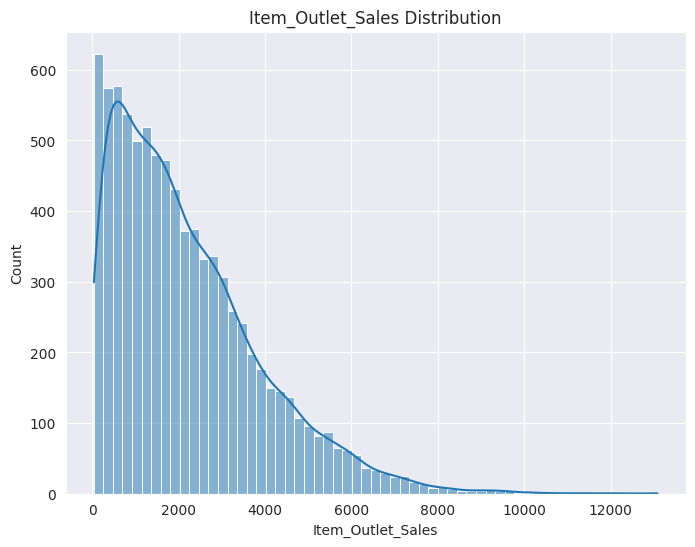

In [613]:
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True)
title = plt.title("Item_Outlet_Sales Distribution")

In [614]:
print('Skewness of y : ', y.skew())
print('Kurtosis of y : ', y.kurt())

Skewness of y :  1.1775306028542796
Kurtosis of y :  1.6158766814287264


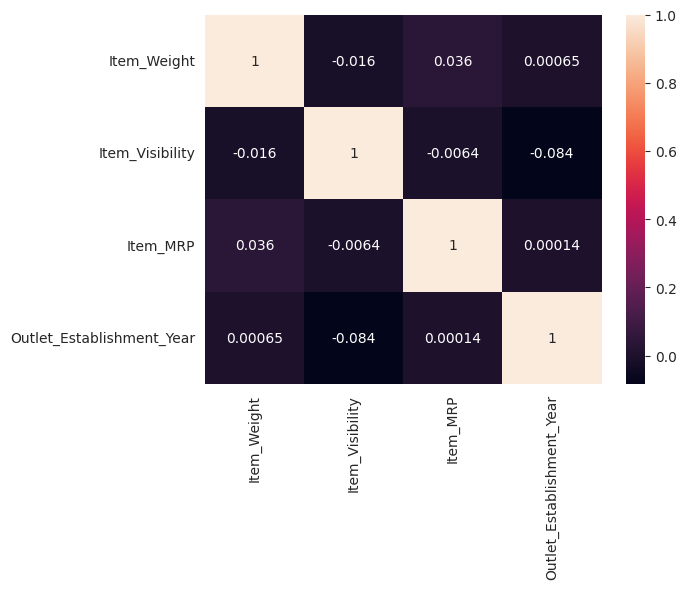

In [615]:
matrix = X.corr()
sns.heatmap(matrix, annot=True)
plt.show()

# Univariate analysis.

## Categorical variables.

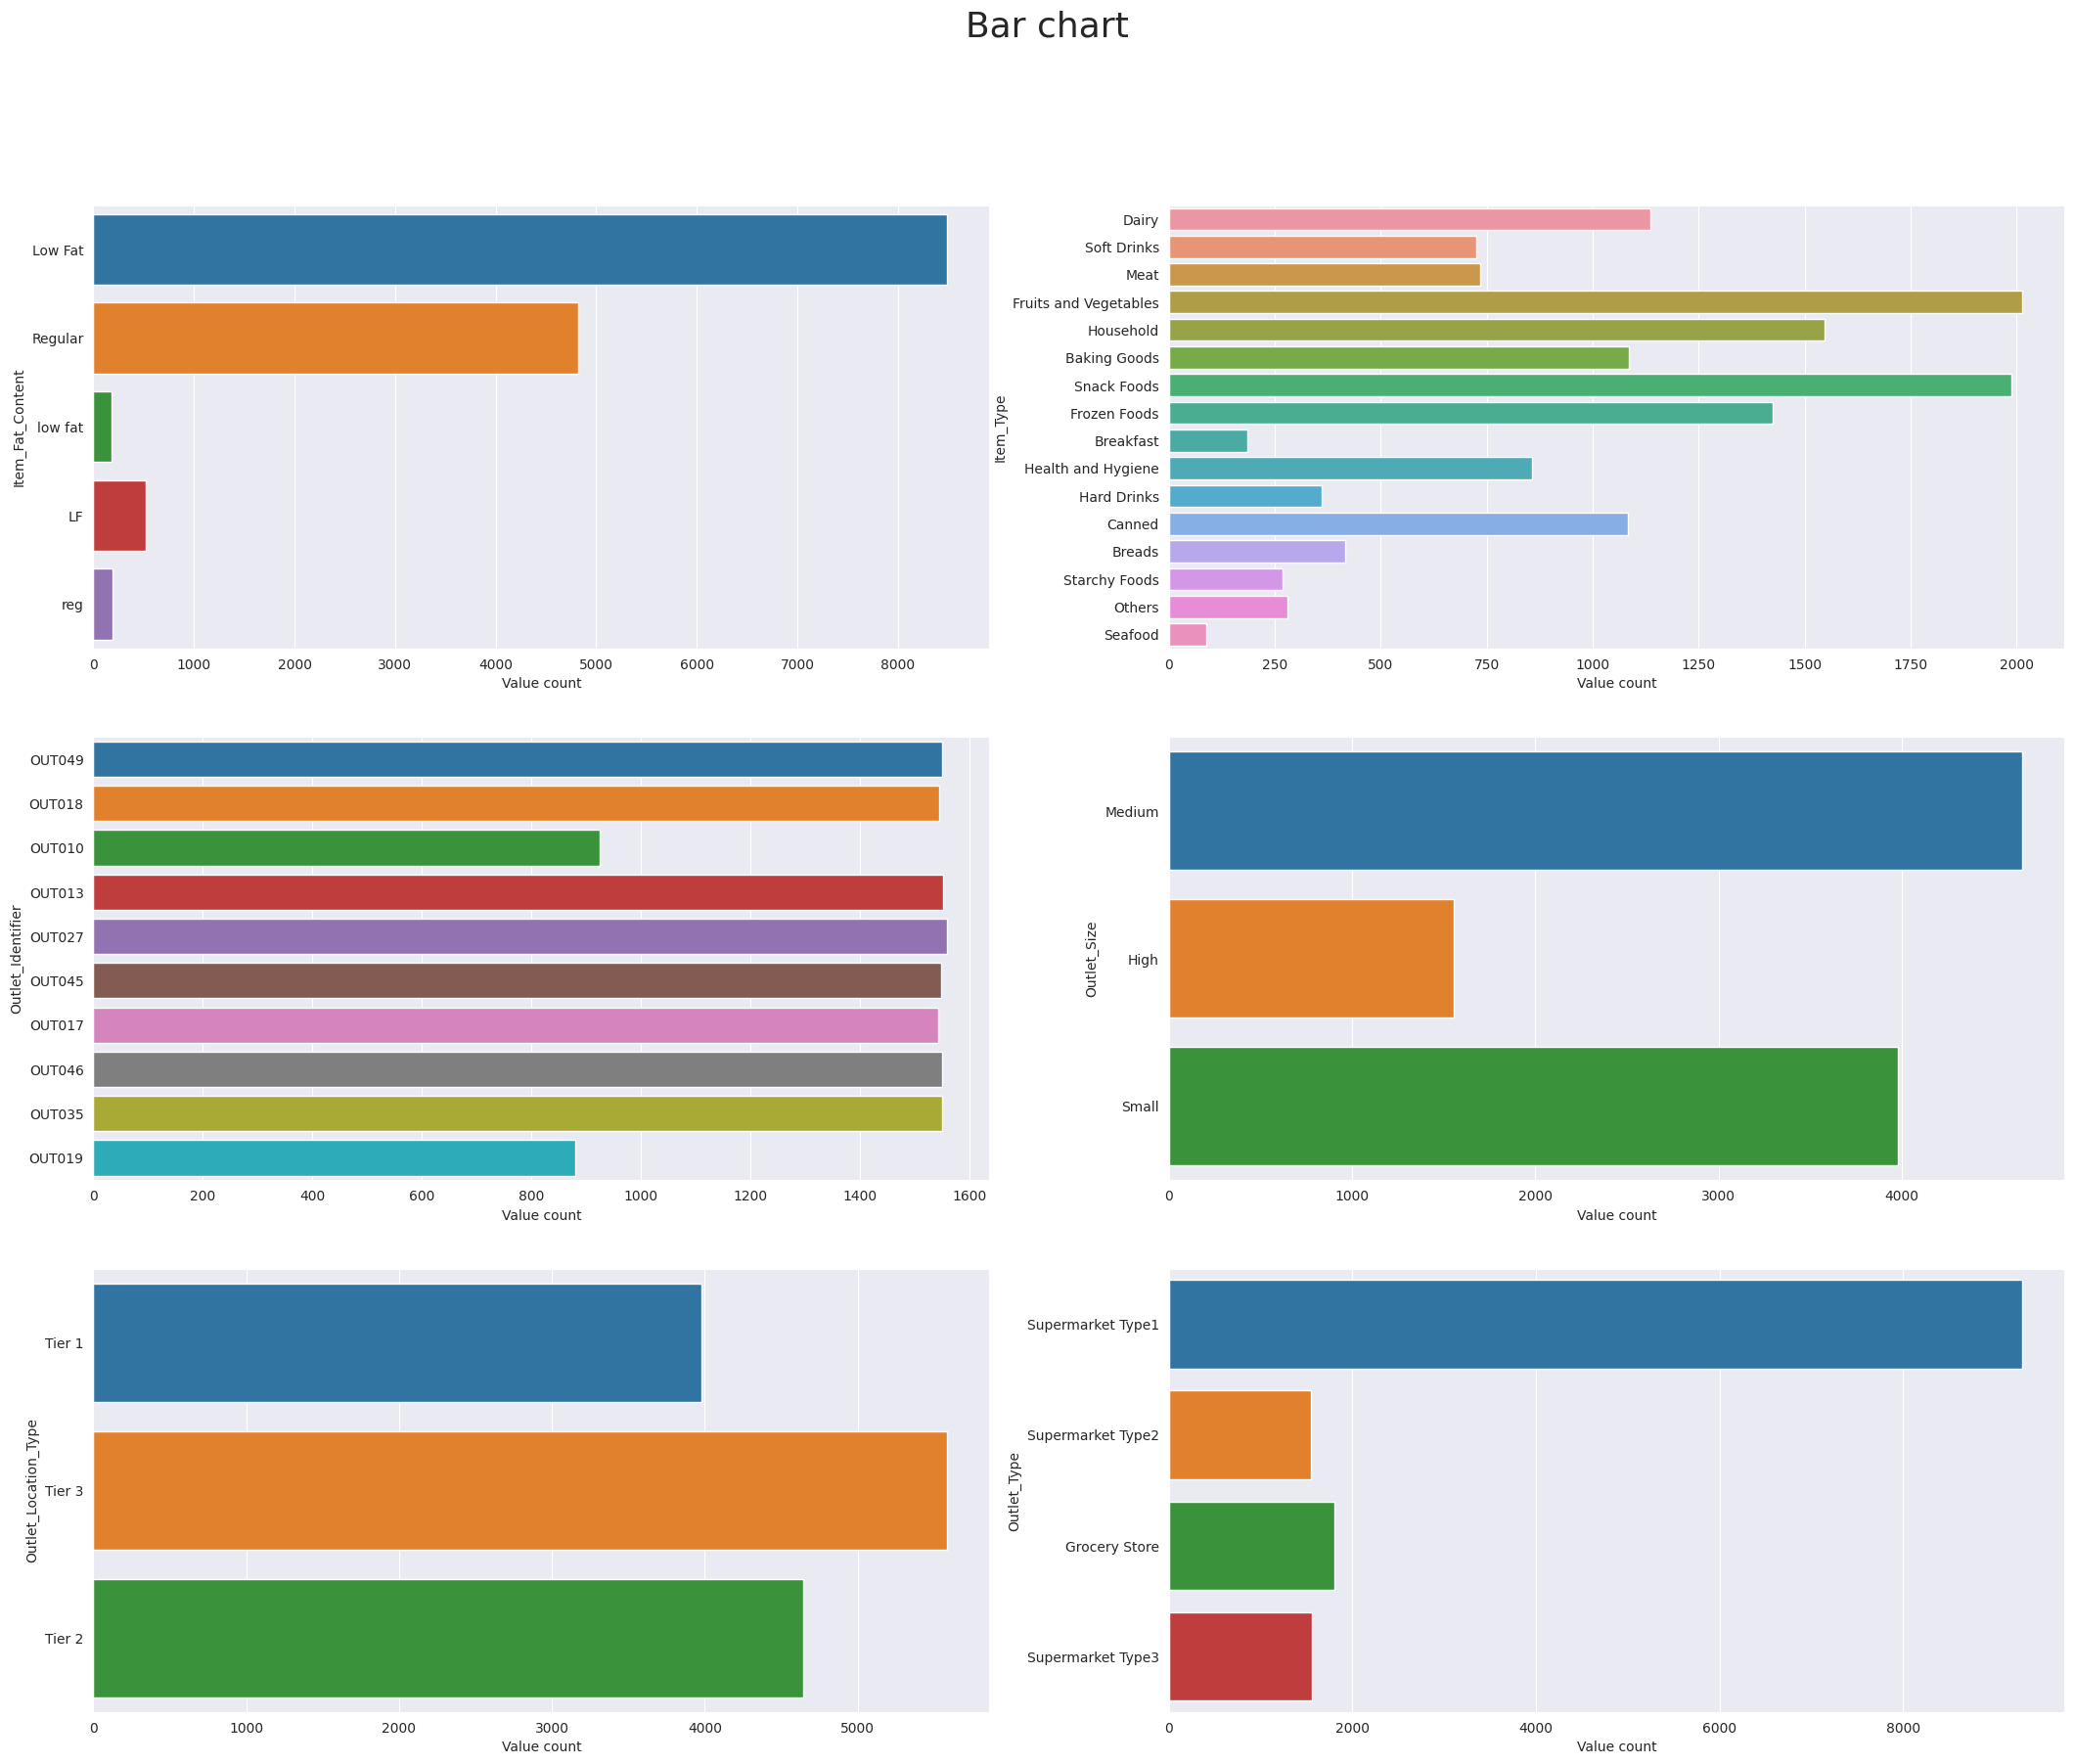

In [616]:
col = [col for col in X.columns if X[col].dtypes == 'object']
col = col[1:]

fig, axs = plt.subplots(3, 2, figsize=(26, 20), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = X, y = X[col[i]], ax=Axis[i])
    Axis[i].set_xlabel('Value count')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Bar chart", fontsize=26)
plt.show()

## Numerical variables.

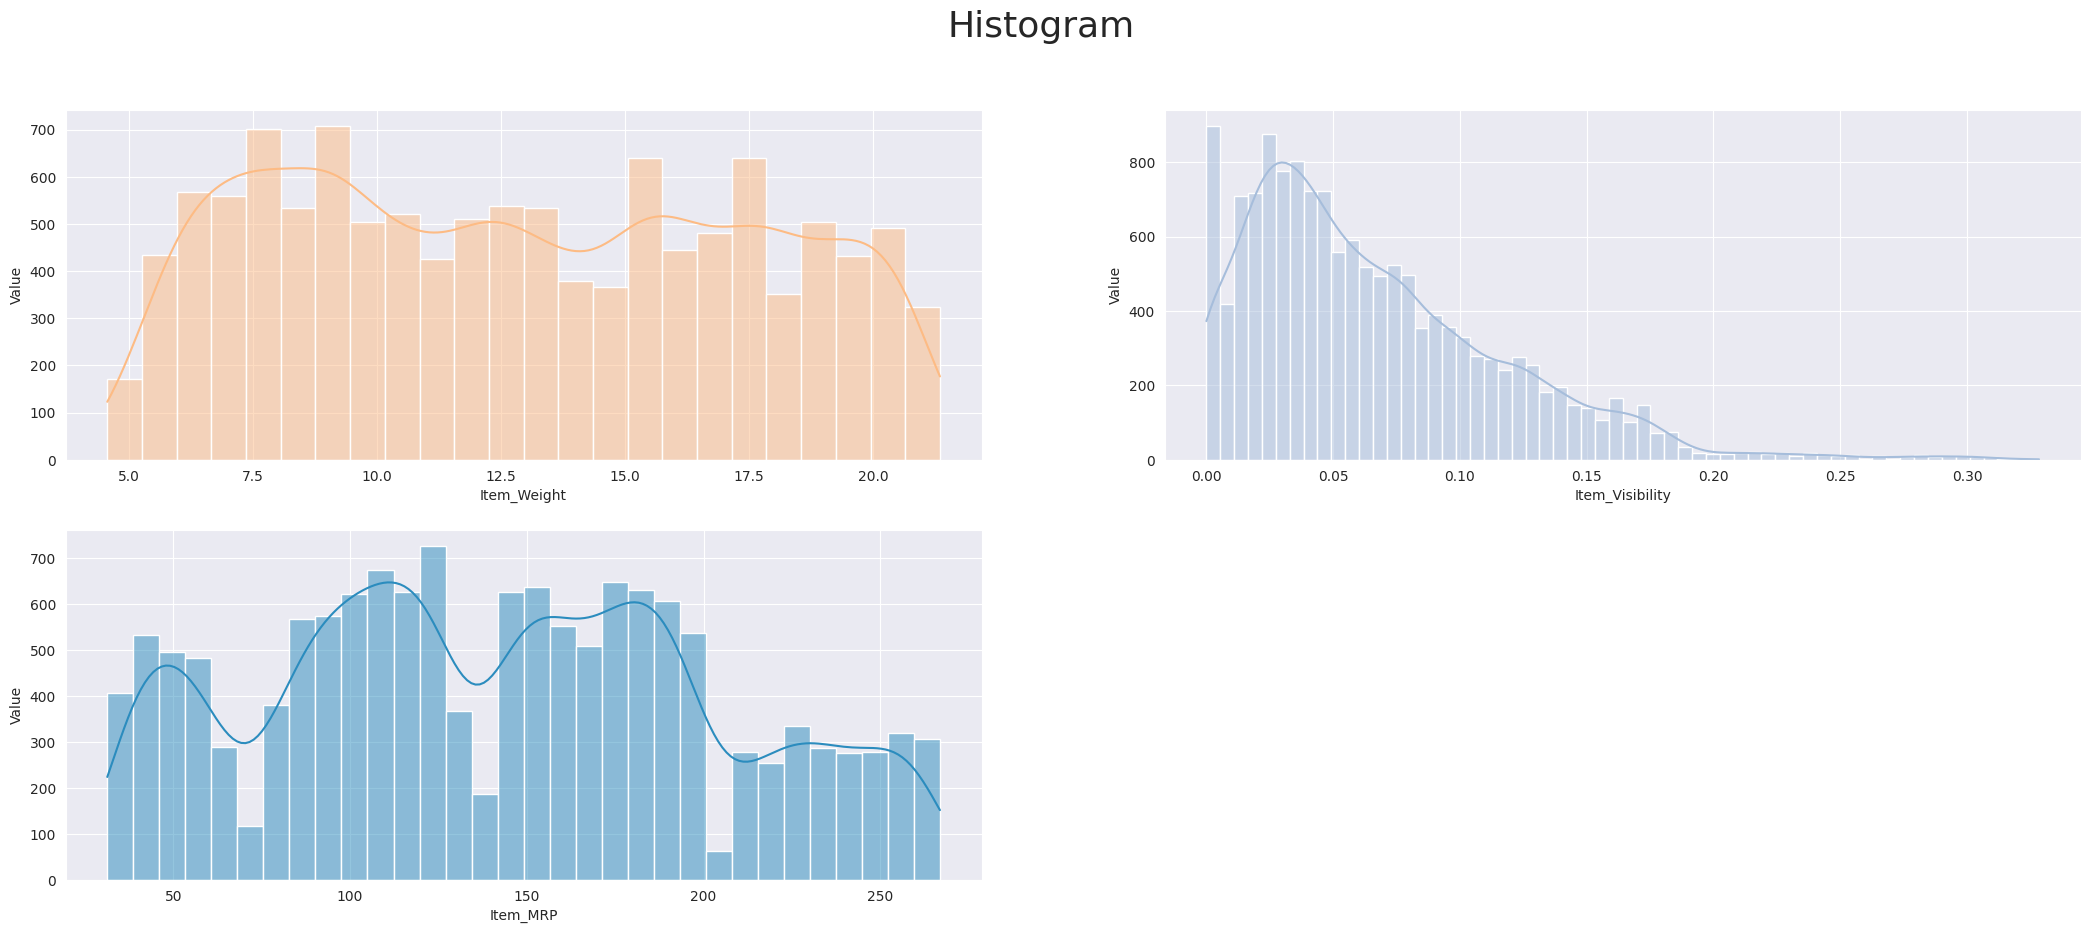

In [617]:
col = [col for col in X.columns if X[col].dtypes == 'float64' or X[col].dtypes == 'int64']
Color = ['#fdbb84', '#a6bddb', '#2b8cbe']
col = col[0:3]
fig, axs = plt.subplots(2, 2, figsize=(26, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(X[col[i]], kde=True, ax=Axis[i], color = Color[i])
    Axis[i].set_ylabel('Value')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Histogram", fontsize=26)
plt.show()

# Bivariate Analysis.

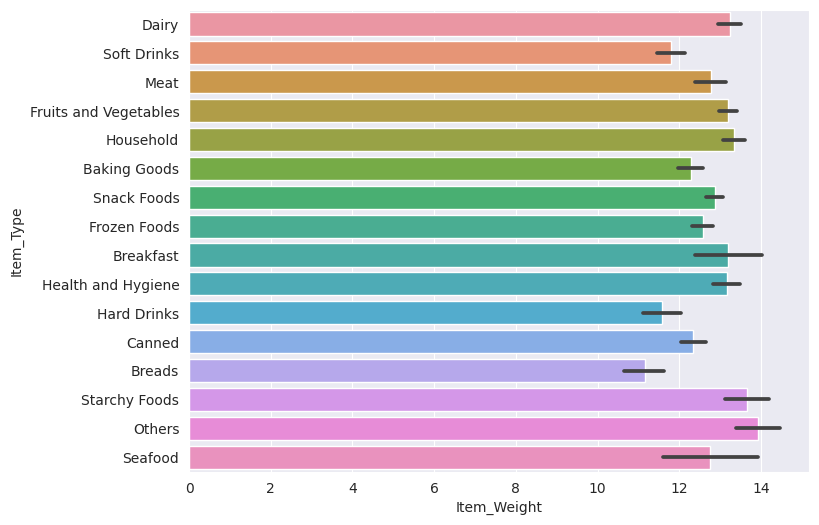

In [618]:
# Item type vs item weight
plt.figure(figsize=(8,6))
sns.barplot(data = X, y = 'Item_Type', x = 'Item_Weight')
plt.show()

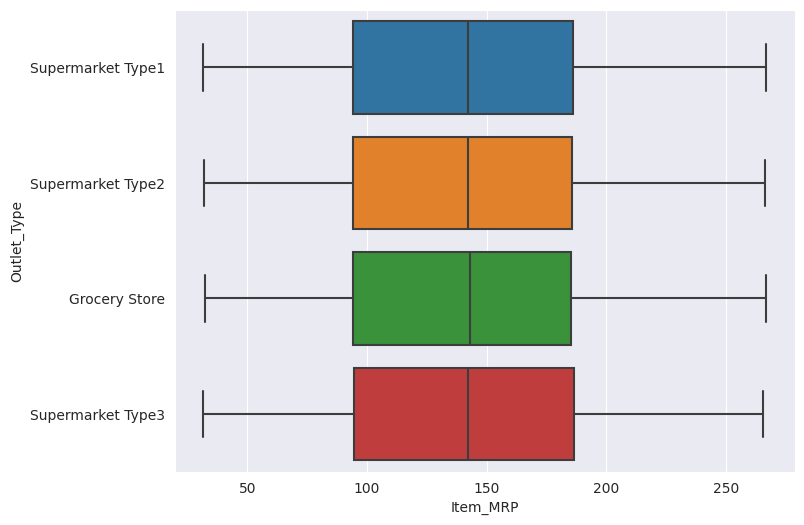

In [619]:
# Outlet type vs item MRP
plt.figure(figsize=(8,6))
sns.boxplot(data = X, y = 'Outlet_Type', x = 'Item_MRP')
plt.show()

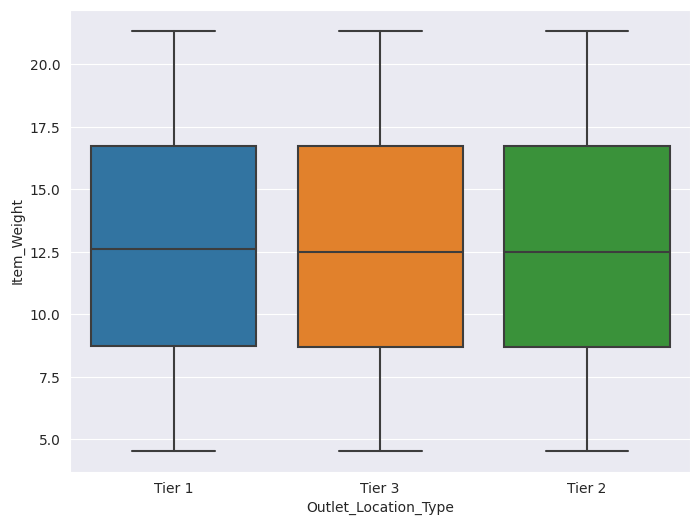

In [620]:
# Outlet Location type vs Item Weight.
plt.figure(figsize=(8,6))
sns.boxplot(data = X, y = 'Item_Weight', x = 'Outlet_Location_Type')
plt.show()

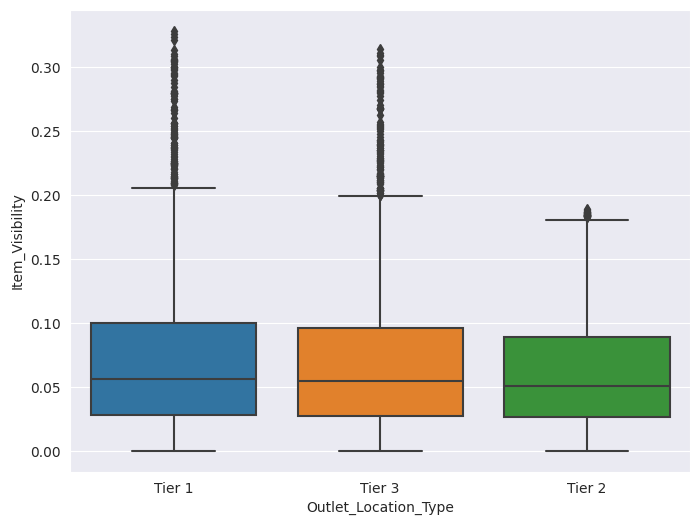

In [621]:
# Item visibility VS Outlet size.
plt.figure(figsize=(8,6))
sns.boxplot(y='Item_Visibility',x='Outlet_Location_Type',data=X)
plt.show()

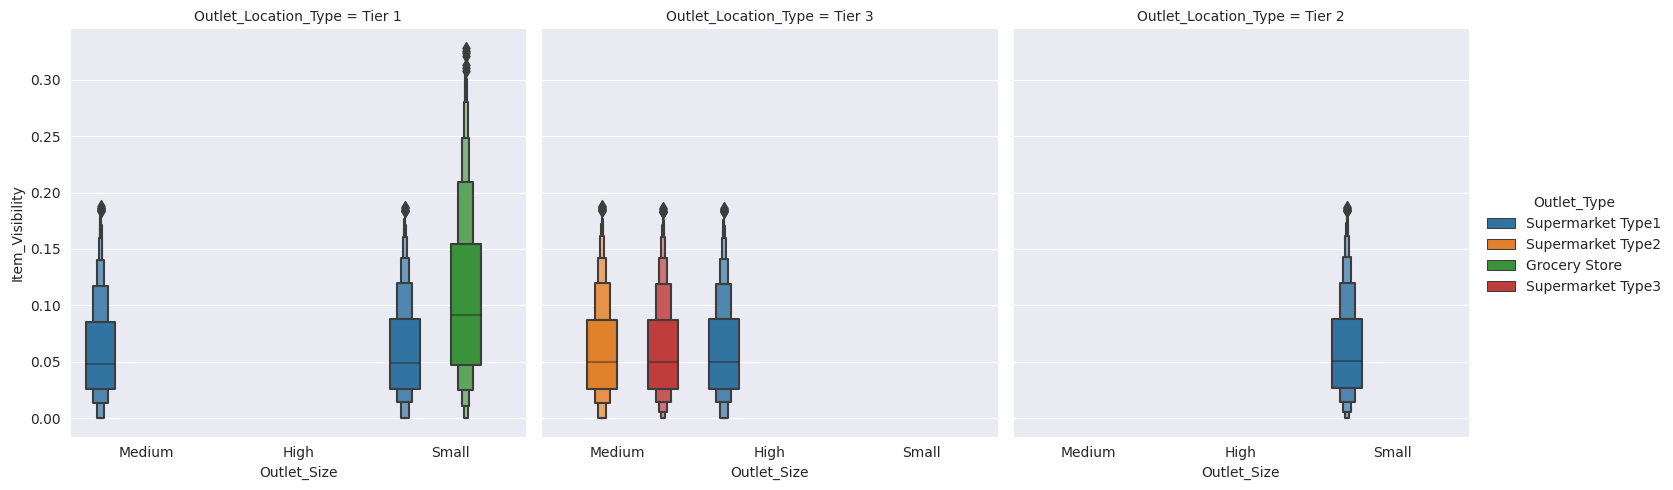

In [622]:
sns.catplot(data=X, x='Outlet_Size',y='Item_Visibility',kind='boxen', col='Outlet_Location_Type', hue='Outlet_Type')
plt.show()

## Feature engineering.

In [623]:
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
cat_col = cat_col[1:]
for i in cat_col:
  print(X[i].value_counts())
  print()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1

In [624]:
X.loc[(X['Item_Fat_Content'] == "LF") | (X['Item_Fat_Content']  == "low fat"), 'Item_Fat_Content'] = 'Low Fat'
X.loc[X['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [625]:
X['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [626]:
CrossTable1=pd.crosstab(X['Outlet_Size'],X['Outlet_Type'])
CrossTable1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [627]:
CrossTable2=pd.crosstab(X['Outlet_Size'],X['Outlet_Location_Type'])
CrossTable2

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [628]:
X['Item_Visibility'] = np.where(X['Item_Visibility'] == 0, 'NaN', X['Item_Visibility']).astype(float)

In [629]:
X['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

# Missing Data.

In [630]:
Miss_col = [col for col in X.columns if X[col].isna().sum() > 0]
No_of_miss = [X[col].isna().sum() for col in X.columns if X[col].isna().sum() > 0]
Per_of_data = [round((X[col].isna().sum() / len(X[col]) * 100), 2) for col in X.columns if X[col].isna().sum() > 0]
Miss_dtype = [X[col].dtypes for col in X.columns if X[col].isna().sum() > 0]
Table = PrettyTable()
Table.add_column('Column', Miss_col)
Table.add_column('No of Missing', No_of_miss)
Table.add_column('% of missing data', Per_of_data)
Table.add_column('Data type', Miss_dtype)
print(Table)

+-----------------+---------------+-------------------+-----------+
|      Column     | No of Missing | % of missing data | Data type |
+-----------------+---------------+-------------------+-----------+
|   Item_Weight   |      2439     |       17.17       |  float64  |
| Item_Visibility |      879      |        6.19       |  float64  |
|   Outlet_Size   |      4016     |       28.27       |   object  |
+-----------------+---------------+-------------------+-----------+


In [631]:
X['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

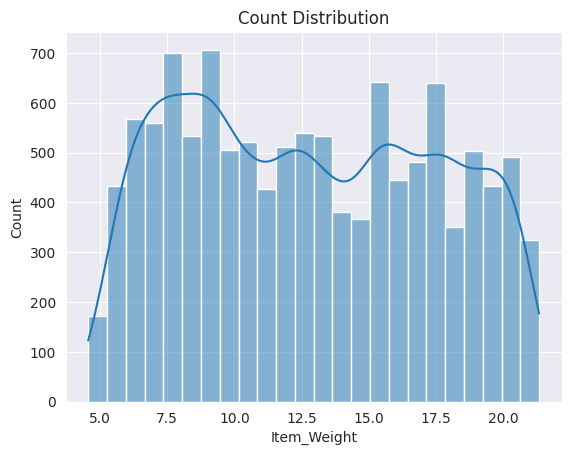

In [632]:
sns.histplot(X['Item_Weight'], kde=True)
plt.title('Count Distribution')
plt.show()

## Numerical missing data.

In [633]:
item_type=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean=X.groupby('Item_Type')['Item_Weight'].mean()
Mean

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [634]:
for i in item_type:
    d={i:Mean[i]}
    s=X.Item_Type.map(d)
    X.Item_Weight=X.Item_Weight.combine_first(s)

In [635]:
Mean_data=X.groupby('Item_Type')['Item_Weight'].mean()

In [636]:
X['Item_Visibility'] = X['Item_Visibility'].fillna(X.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

## Categorical missing data.

In [637]:
Gro_store={'Grocery Store':'Small'}
s=X.Outlet_Type.map(Gro_store)
X.Outlet_Size=X.Outlet_Size.combine_first(s)

In [638]:
Tier_2={'Tier 2':'Small'}
s=X.Outlet_Location_Type.map(Tier_2)
X.Outlet_Size=X.Outlet_Size.combine_first(s)

In [639]:
X.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Normality Check.

In [640]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16,5))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f"Histogram of {variable}")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Q-Q plot of {variable}")
  plt.show()

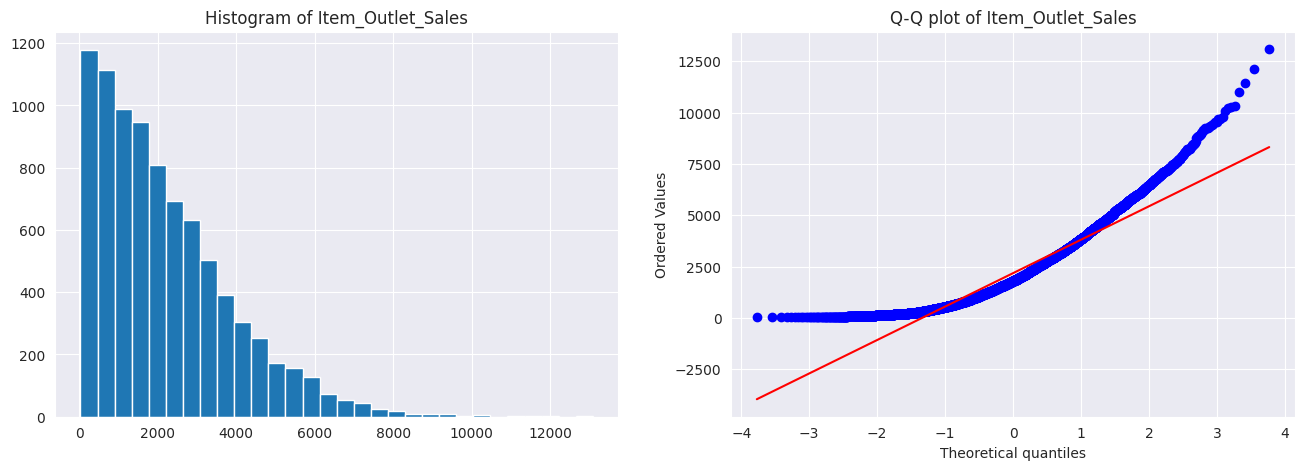

In [641]:
diagnostic_plots(train_data, "Item_Outlet_Sales")

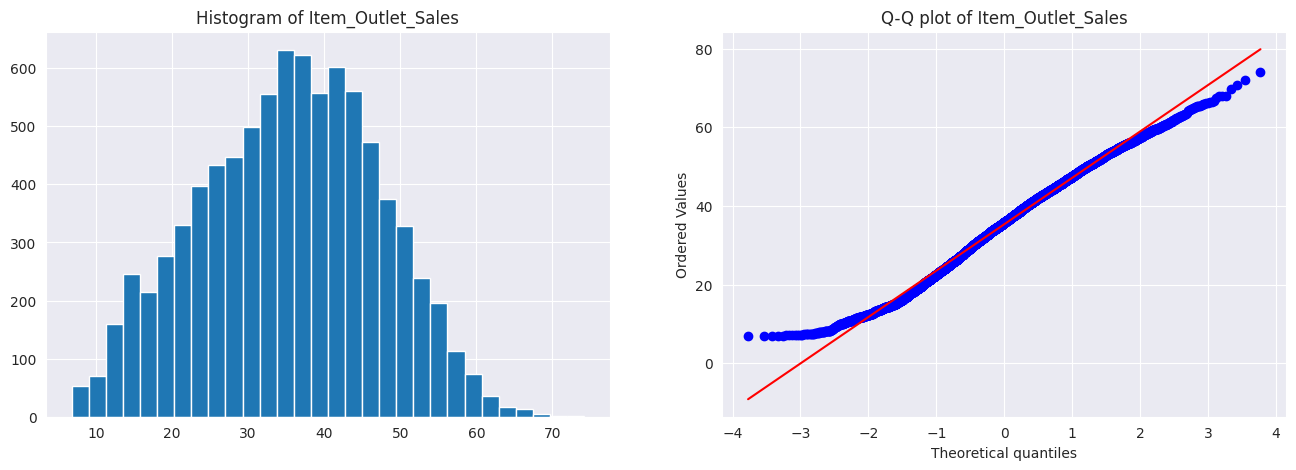

In [642]:
train_data['Item_Outlet_Sales'],parameters=stats.boxcox(train_data['Item_Outlet_Sales'])
diagnostic_plots(train_data,'Item_Outlet_Sales')

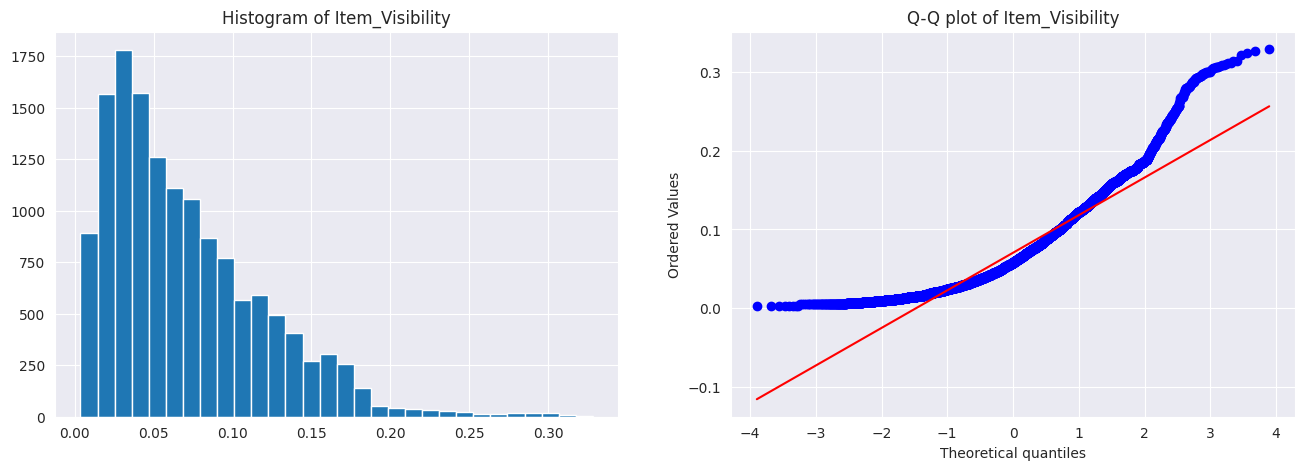

In [643]:
diagnostic_plots(X, "Item_Visibility")

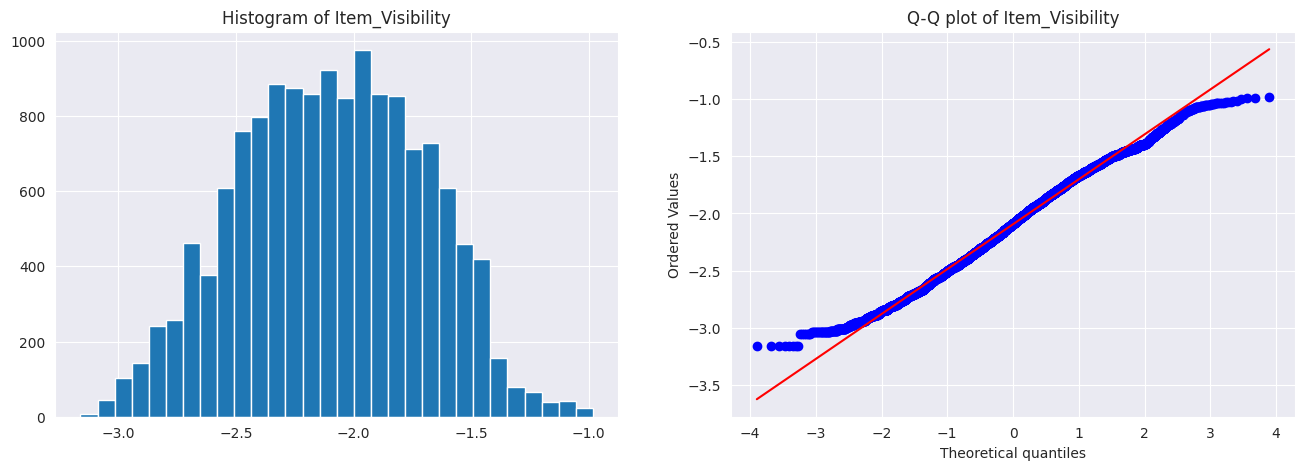

In [644]:
X['Item_Visibility'], parameters = stats.boxcox(X['Item_Visibility'])
diagnostic_plots(X, "Item_Visibility")